# CIS 520 Final Project

**DengAI**

**Pranav Panganamamula**

**Dinesh Jagai**

**Julian Schnitzler**

## Import Libraries

In [1]:
import pandas as pd
import matplotlib
import math
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from collections import deque
import tensorflow as tf
from tensorflow import keras
from sklearn import linear_model
from sklearn import ensemble
from sklearn import kernel_ridge
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import random
import pickle
%matplotlib inline

In [2]:
from google.colab import drive #(NO NEED TO RUN THIS AGAIN)
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})

## Import Data

In [0]:
# Load in the data (N.b - the data can either be raw (with missing values), mean imputed, regression imputed)
# Code is equivalent to:
'''
X_train = pd.read_csv("dengue_features_train_mean_imputed.csv")
y_train = pd.read_csv("dengue_labels_train.csv")
X_test = pd.read_csv("dengue_features_test_mean_imputed.csv")

path_regression_train = "dengue_features_train_mean_imputed.csv" 
path_regression_test = "dengue_features_test_mean_imputed.csv"
X_train_regression_imputed = pd.read_csv(path_regression_train)
X_test_regression_imputed = pd.read_csv(path_regression_test)
'''

X_train = pd.read_csv("https://raw.githubusercontent.com/dineshjagai/CIS-520-Final-Project/master/data/dengue_features_train.csv")
X_test = pd.read_csv("https://raw.githubusercontent.com/dineshjagai/CIS-520-Final-Project/master/data/dengue_features_test.csv")

X_train_base_imputed = pd.read_csv("https://raw.githubusercontent.com/dineshjagai/CIS-520-Final-Project/master/data_mean_imputated/dengue_features_train_mean_imputed.csv?token=AHUIMVLMT4UVKYXBRKUQHA256Z2NG")
y_train = pd.read_csv("https://raw.githubusercontent.com/dineshjagai/CIS-520-Final-Project/master/data/dengue_labels_train.csv?token=AHUIMVJZ2V5HBUEJXHFV6HK56Z2ZI")

X_test_base_imputed = pd.read_csv("https://raw.githubusercontent.com/dineshjagai/CIS-520-Final-Project/master/data_mean_imputated/dengue_features_test_mean_imputed.csv?token=AHUIMVPYWGROYT5V3QFPBZ256Z256")



# Regression Imputation


In [5]:
data_train = pd.DataFrame.join(X_train_base_imputed, y_train, rsuffix = "_r")
data_train = data_train.drop(['city_r', 'year_r', 'weekofyear_r'], axis=1)

data_train_missing = pd.DataFrame.join(X_train, y_train, rsuffix = "_r")
data_train_regressed = data_train_missing.copy()
data_train_missing = data_train_missing.drop(['city_r', 'year_r', 'weekofyear_r'], axis=1)

# Extract city specific data and drop 'city' column from DataFames
data_test_sj = X_test_base_imputed[X_test_base_imputed['city'] == 'sj']
data_test_iq = X_test_base_imputed[X_test_base_imputed['city'] == 'iq']
data_test_sj = data_test_sj.drop(['city'], axis=1)
data_test_iq = data_test_iq.drop(['city'], axis=1)

data_train_sj = data_train[data_train['city'] == 'sj']
data_train_iq = data_train[data_train['city'] == 'iq']
data_train_sj = data_train_sj.drop(['city'], axis=1)
data_train_iq = data_train_iq.drop(['city'], axis=1)

data_train_missing_sj = data_train_missing[data_train_missing['city'] == 'sj']
data_train_missing_iq = data_train_missing[data_train_missing['city'] == 'iq']
data = data_train_missing_sj.copy()
data2 = data_train_missing_iq.copy()

data_train_missing_sj = data_train_missing_sj.drop(['city'], axis=1)
data_train_missing_iq = data_train_missing_iq.drop(['city'], axis=1)

data_test_missing_sj = X_test[X_test['city'] == 'sj']
data_test_missing_iq = X_test[X_test['city'] == 'iq']
data3 = data_test_missing_sj.copy()
data4 = data_test_missing_iq.copy()

data_test_missing_sj = data_test_missing_sj.drop(['city'], axis=1)
data_test_missing_iq = data_test_missing_iq.drop(['city'], axis=1)

X_test.head()
# process data

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,4/29/2008,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,299.528571,7.057143,306.3,294.7,75.2
1,sj,2008,19,5/6/2008,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,299.071429,5.557143,303.0,295.2,34.3
2,sj,2008,20,5/13/2008,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,300.928571,7.785714,305.8,295.8,3.0
3,sj,2008,21,5/20/2008,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,301.057143,6.271429,306.3,297.4,0.3
4,sj,2008,22,5/27/2008,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,300.614286,7.085714,306.3,296.3,84.1


In [0]:
# Drop irrelevant features 
y_train_sj = data_train_sj['total_cases']
X_train_sj = data_train_sj.drop(['total_cases', 'week_start_date', 'year', 'weekofyear'], axis=1)

# Convert to numpy array 
X_train_sj_np = X_train_sj.to_numpy()

y_train_sj_np = y_train_sj.to_numpy()
y_train_sj_np = np.reshape(y_train_sj_np, (len(y_train_sj_np), 1))

y_train_iq = data_train_iq['total_cases']
X_train_iq = data_train_iq.drop(['total_cases', 'week_start_date', 'year', 'weekofyear'], axis=1)

X_train_iq_np = X_train_iq.to_numpy()
y_train_iq_np = y_train_iq.to_numpy()
y_train_iq_np = np.reshape(y_train_iq_np, (len(y_train_iq_np), 1))

X_test_sj = data_test_sj.drop(['week_start_date', 'year', 'weekofyear'], axis=1)
X_test_sj_np = X_test_sj.to_numpy()

X_test_iq = data_test_iq.drop(['week_start_date', 'year', 'weekofyear'], axis=1)
X_test_iq_np = X_test_iq.to_numpy()

########################################################################

X_train_missing_sj = data_train_missing_sj.drop(['total_cases', 'week_start_date', 'year', 'weekofyear'], axis=1)
X_train_missing_sj_np = X_train_missing_sj.to_numpy()

X_train_missing_iq = data_train_missing_iq.drop(['total_cases', 'week_start_date', 'year', 'weekofyear'], axis=1)
X_train_missing_iq_np = X_train_missing_iq.to_numpy()

X_test_missing_sj = data_test_missing_sj.drop(['week_start_date', 'year', 'weekofyear'], axis=1)
X_test_missing_sj_np = X_test_missing_sj.to_numpy()

X_test_missing_iq = data_test_missing_iq.drop(['week_start_date', 'year', 'weekofyear'], axis=1)
X_test_missing_iq_np = X_test_missing_iq.to_numpy()

#X_train_sj.head()


# Perform Regression Imputation

In [0]:
def regressedImpute(X_baseImputed, X_miss):
    '''
    Returns :
        X_imputed which has mean of the linearly regressed value instead of the missing values and same shape as X_miss.
    if computePerFeatureStatistics is True, also:
        list of Frobenius norms of difference between reconstructions and original data (without missing values) calculated after each imputing each column.
        list of accuracies on test set of Logistic Regression classifier trained on imputed data after each imputing each column.
    '''

    X_imputed = X_baseImputed.copy()
    (n, p) = X_imputed.shape

    # We do a linear regression based imputation here, for each column, train a classifier to predict its value based on values of other features and
    # replace the NaN with the predicted values. 
    
    for i in range(p):
        rows = np.isnan(X_miss[:, i]) 
        regress_rows = X_baseImputed[~rows]
        data = np.delete(regress_rows, i, 1)
        regress_y = X_baseImputed[~rows, i]
        missing = X_baseImputed[rows]
        miss = np.delete(missing, i, 1) 
        if (len(miss) == 0):
            continue
        clf = LinearRegression().fit(data, regress_y) 
        y_predict = clf.predict(miss)
        index = rows.nonzero()[0]
        np.put(X_imputed[:, i], index, y_predict) 

    return X_imputed
    

In [0]:
# Obtain baseline regression imputed features
X_regressed_sj = regressedImpute(X_train_sj_np, X_train_missing_sj_np)
X_regressed_iq = regressedImpute(X_train_iq_np, X_train_missing_iq_np)

X_test_regressed_sj = regressedImpute(X_test_sj_np, X_test_missing_sj_np)
X_test_regressed_iq = regressedImpute(X_test_iq_np, X_test_missing_iq_np)

epochs = 5

# Improve imputation by repeating process using the previous imputation as the baseline imputation for the next imputing
for i in range(epochs):
    X_copy_sj = X_regressed_sj.copy()
    X_copy_iq = X_regressed_iq.copy()
    X_test_copy_sj = X_test_regressed_sj.copy()
    X_test_copy_iq = X_test_regressed_iq.copy()
    
    X_regressed_sj = regressedImpute(X_copy_sj, X_train_missing_sj_np)
    X_regressed_iq = regressedImpute(X_copy_iq, X_train_missing_iq_np)
    
    X_test_regressed_sj = regressedImpute(X_test_copy_sj, X_test_missing_sj_np)
    X_test_regressed_iq = regressedImpute(X_test_copy_iq, X_test_missing_iq_np)

# Set up list of features
column_list = list(data_train_regressed.columns.values.tolist()) 
column_list.remove('city')
column_list.remove('year')
column_list.remove('weekofyear')
column_list.remove('week_start_date')
column_list.remove('total_cases')
column_list.remove('city_r')
column_list.remove('year_r')
column_list.remove('weekofyear_r')

# Create city DataFrames for the imputed values
sj_df = pd.DataFrame(X_regressed_sj, columns=column_list)
iq_df = pd.DataFrame(X_regressed_iq, columns=column_list)

sj_test_df = pd.DataFrame(X_test_regressed_sj, columns=column_list)
iq_test_df = pd.DataFrame(X_test_regressed_iq, columns=column_list)

# Update original DataFrames with new imputed values
data = data.reset_index(drop=True)
data2 = data2.reset_index(drop=True)
data.update(sj_df)
data2.update(iq_df)

data3 = data3.reset_index(drop=True)
data4 = data4.reset_index(drop=True)
data3.update(sj_test_df)
data4.update(iq_test_df)

# Concatenate city datasets
data_reg = pd.concat([data, data2])
data_reg = data_reg.reset_index(drop=True)

data_test_reg = pd.concat([data3, data4])
data_test_reg = pd.concat([data3, data4])

#data_test_reg.head() 
data_test_reg.head() 

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,4/29/2008,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,299.528571,7.057143,306.3,294.7,75.2
1,sj,2008,19,5/6/2008,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,299.071429,5.557143,303.0,295.2,34.3
2,sj,2008,20,5/13/2008,-0.001500,-0.007735,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,300.928571,7.785714,305.8,295.8,3.0
3,sj,2008,21,5/20/2008,0.020401,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,301.057143,6.271429,306.3,297.4,0.3
4,sj,2008,22,5/27/2008,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,300.614286,7.085714,306.3,296.3,84.1


In [0]:
# Dataframe for regressed imputed data exported to csv file and uploaded to Github separately on local machine

X_train_regression_imputed = pd.read_csv("https://raw.githubusercontent.com/dineshjagai/CIS-520-Final-Project/master/data_regressed_imputed/dengue_features_train_regressed_imputed.csv?token=AK72LX6E665WSTCSLAPM74K57A4DA")
X_test_regression_imputed = pd.read_csv("https://raw.githubusercontent.com/dineshjagai/CIS-520-Final-Project/master/data_regressed_imputed/dengue_features_test_regressed_imputed.csv?token=AK72LX33SSHA7LSYAIVDTPC57A4HG")

# Seperate The Data iInt

In [0]:
# Seperate the data into their respective positions
X_data_train_sj = X_train_base_imputed[X_train_base_imputed['city'] == 'sj']
X_data_train_iq = X_train_base_imputed[X_train_base_imputed['city'] == 'iq']  
y_data_train_sj = y_train[y_train['city'] == 'sj']
y_data_train_iq = y_train[y_train['city'] == 'iq']
X_data_test_sj  = X_test[X_test['city'] == 'sj']
X_data_test_iq  = X_test[X_test['city'] == 'iq']

# Regressed data 
X_train_regression_imputed_sj = X_train_regression_imputed[X_train_regression_imputed['city'] == 'sj']
X_train_regression_imputed_iq = X_train_regression_imputed[X_train_regression_imputed['city'] == 'iq']
X_test_regression_imputed_sj = X_test_regression_imputed[X_test_regression_imputed['city'] == 'sj']
X_test_regression_imputed_iq = X_test_regression_imputed[X_test_regression_imputed['city'] == 'iq']

# drop the uncessary parts
y_data_train_sj = y_data_train_sj.drop(["city","year", "weekofyear"], axis=1)
y_data_train_iq = y_data_train_iq.drop(["city","year", "weekofyear"], axis=1)

# put features and label into one dataset (needed e.g. for correlation)
data_train_sj = pd.concat([X_data_train_sj, y_data_train_sj], axis=1)
data_train_iq = pd.concat([X_data_train_iq, y_data_train_iq], axis=1)

# Training (Mean Imputed Values)
X_data_train_sj = X_data_train_sj.drop(["city","year", "week_start_date", "weekofyear"], axis=1)
X_data_train_iq = X_data_train_iq.drop(["city","year", "week_start_date", "weekofyear"], axis=1)

# Testing (Mean Imputed Values)
X_data_test_sj = X_data_test_sj.drop(["city","year", "week_start_date", "weekofyear"], axis=1)
X_data_test_iq = X_data_test_iq.drop(["city","year", "week_start_date", "weekofyear"], axis=1)

#  Training Regression Imputed Values 
X_train_regression_imputed_sj = X_train_regression_imputed_sj.drop(["city","year", "week_start_date", "weekofyear", "total_cases"], axis=1)
X_train_regression_imputed_iq = X_train_regression_imputed_iq.drop(["city","year", "week_start_date", "weekofyear", "total_cases"], axis=1)

# Testing (Regression Imputed Values)
X_test_regression_imputed_sj = X_test_regression_imputed_sj.drop(["city","year", "week_start_date", "weekofyear"], axis=1)
X_test_regression_imputed_iq = X_test_regression_imputed_iq.drop(["city","year", "week_start_date", "weekofyear"], axis=1)


# Visualize The Data

In [0]:
#  view all the Data (As a style )
# X_data_train_sj.style
# X_data_train_iq .style
# y_data_train_iq.style
# y_data_train_sj.style
# X_train_regression_imputed_sj.style
# X_train_regression_imputed_iq.style

# Histogram Of Cases For IQ and SJ in training Set 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde8308ea90>]],
      dtype=object)

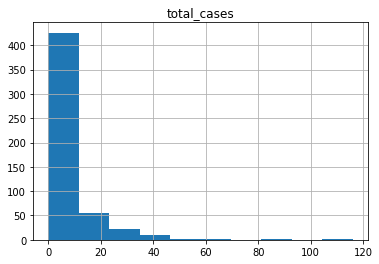

In [0]:
y_data_train_iq.hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde7f888ba8>]],
      dtype=object)

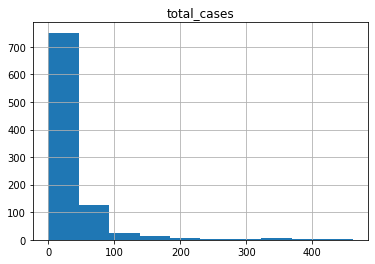

In [0]:
y_data_train_sj.hist()

In [0]:
# Table containing all of the data 
# print(X_train.as_matrix)



# X_data_train.style
# X_data_train.head()
# X_data_train.describe()
# X_data_train.info()
# X_data_train.shape
# pd.plotting.scatter_matrix(data_train)

# Plot Of the Correlation Matrix For IQ

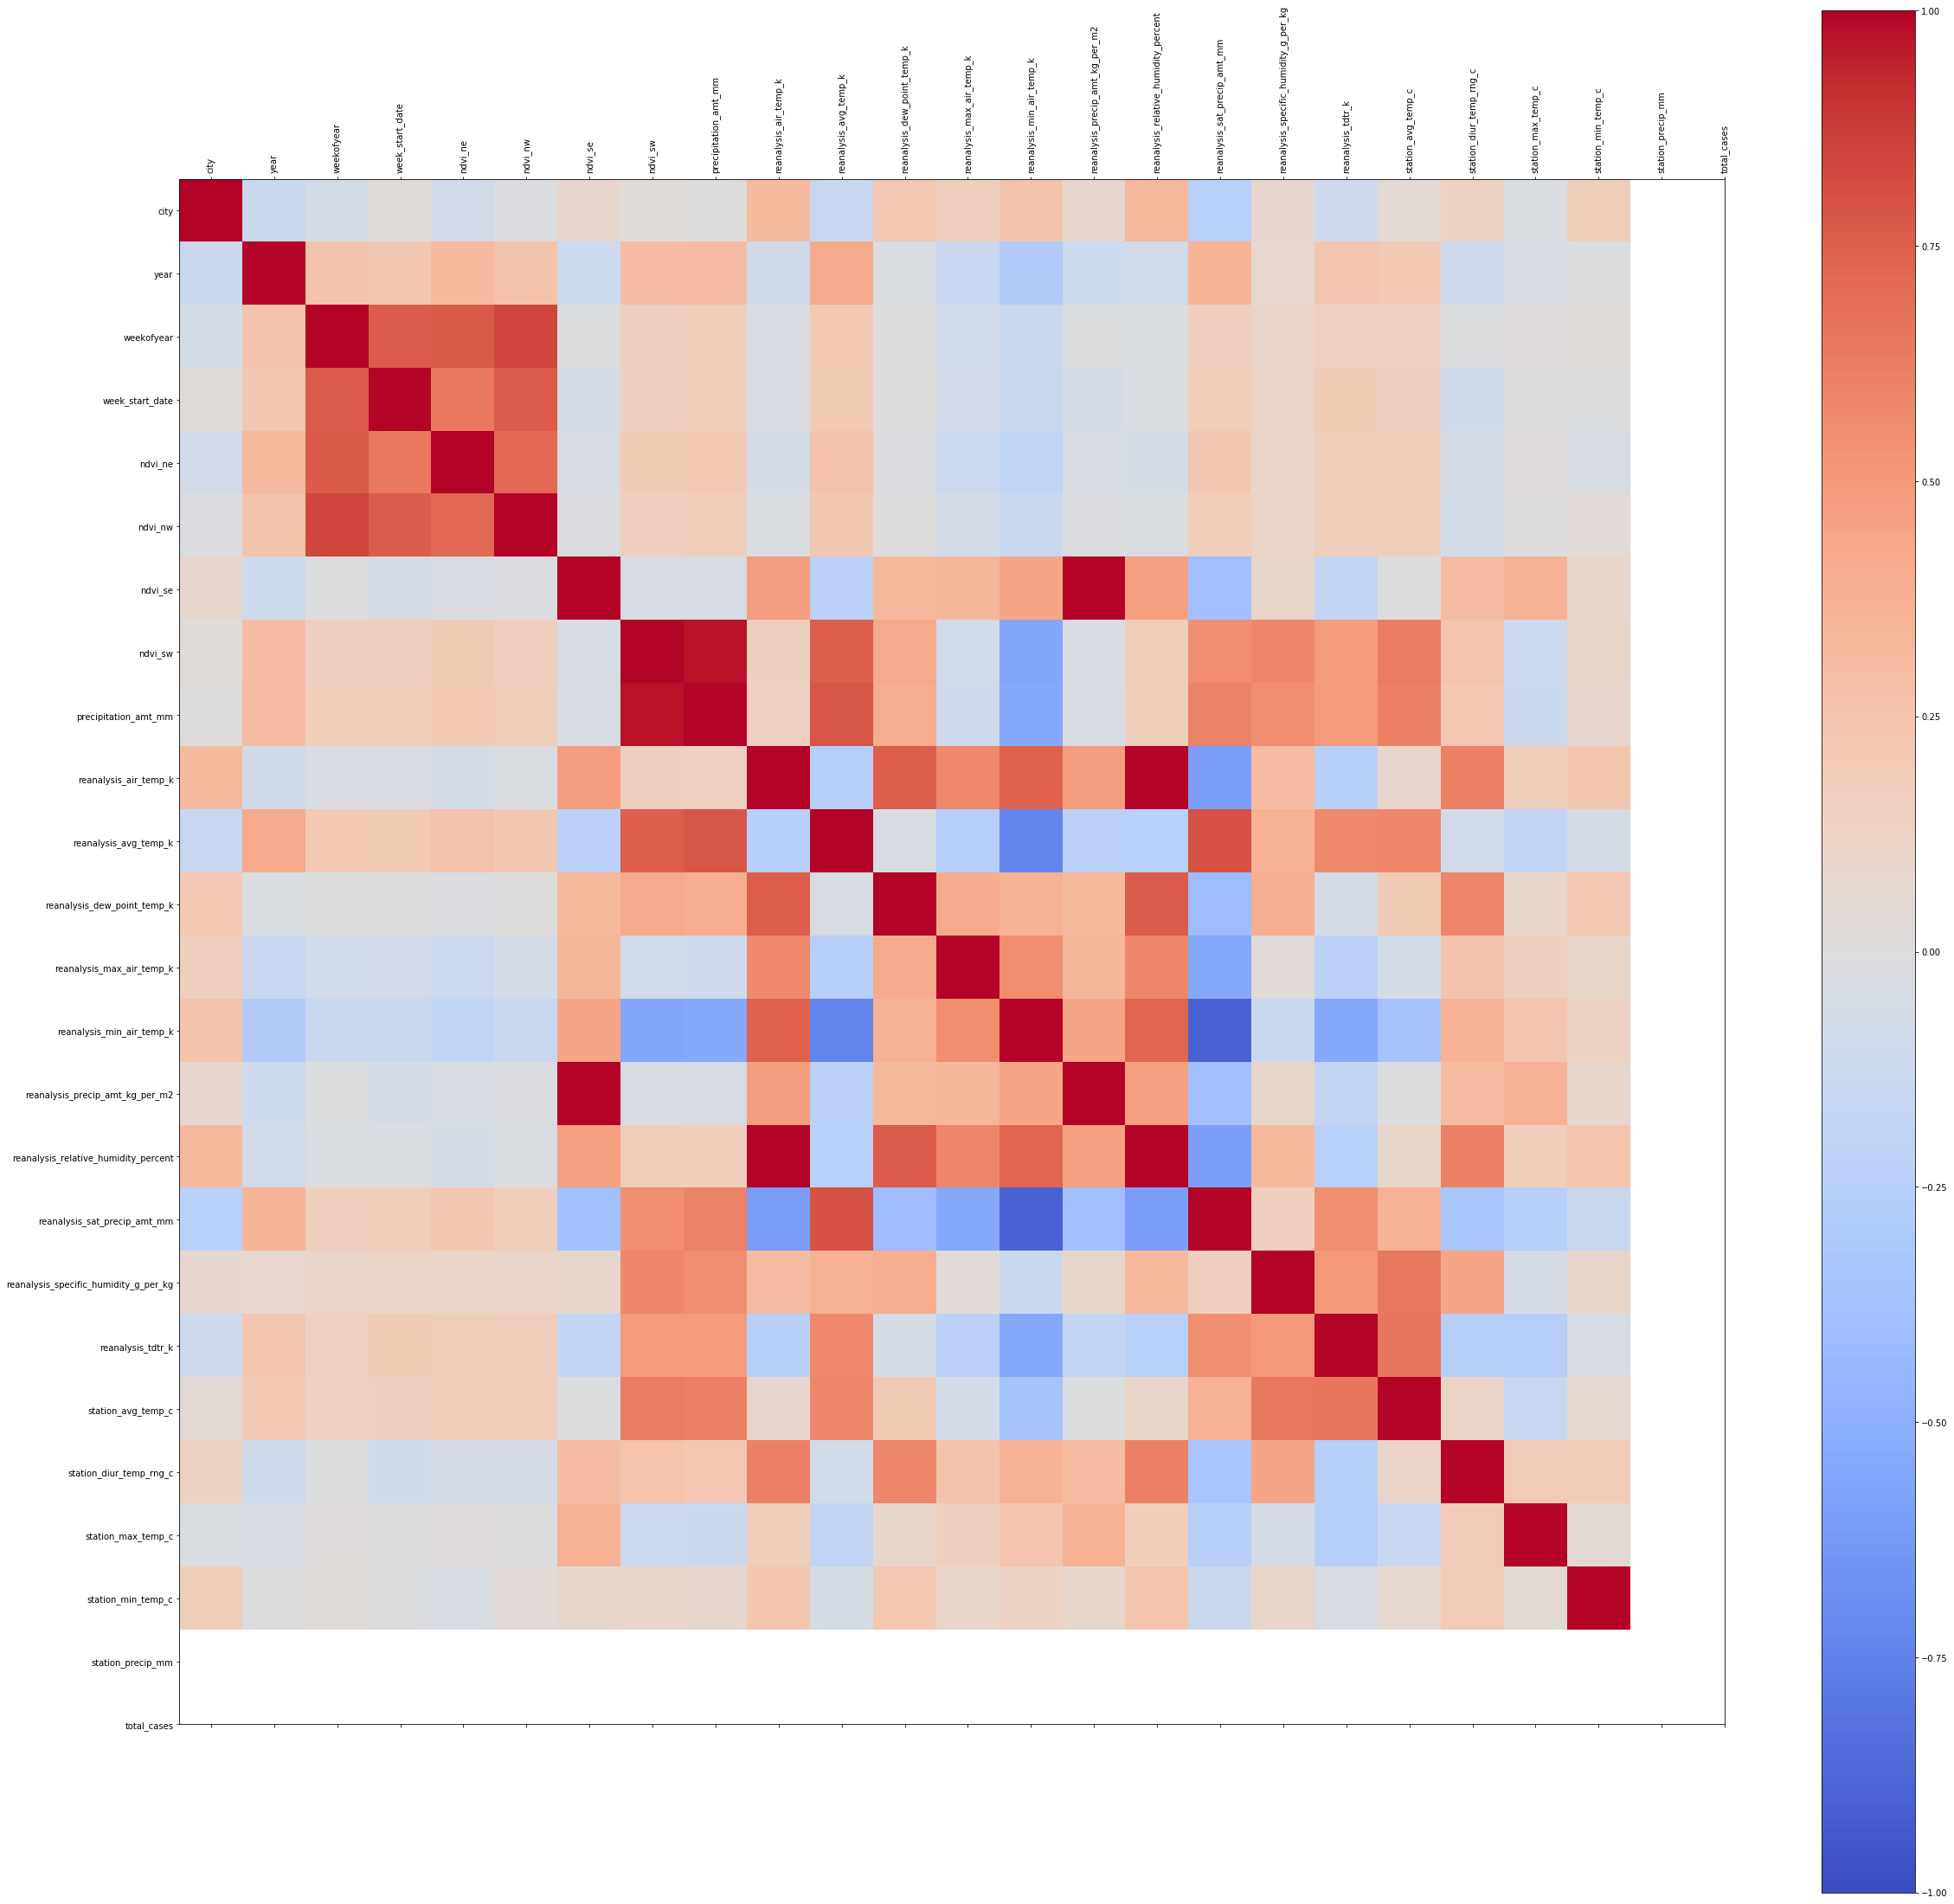

In [0]:
# plot correlation matrix for Iq  (Mean Imputed Values)
data_train_iq['total_cases'] = data_train_iq['total_cases'].astype('float')

corr = data_train_iq.corr()
fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_train_iq.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_train_iq.columns)
ax.set_yticklabels(data_train_iq.columns)
plt.show()

# Plot Of The Correlation Matrix For SJ

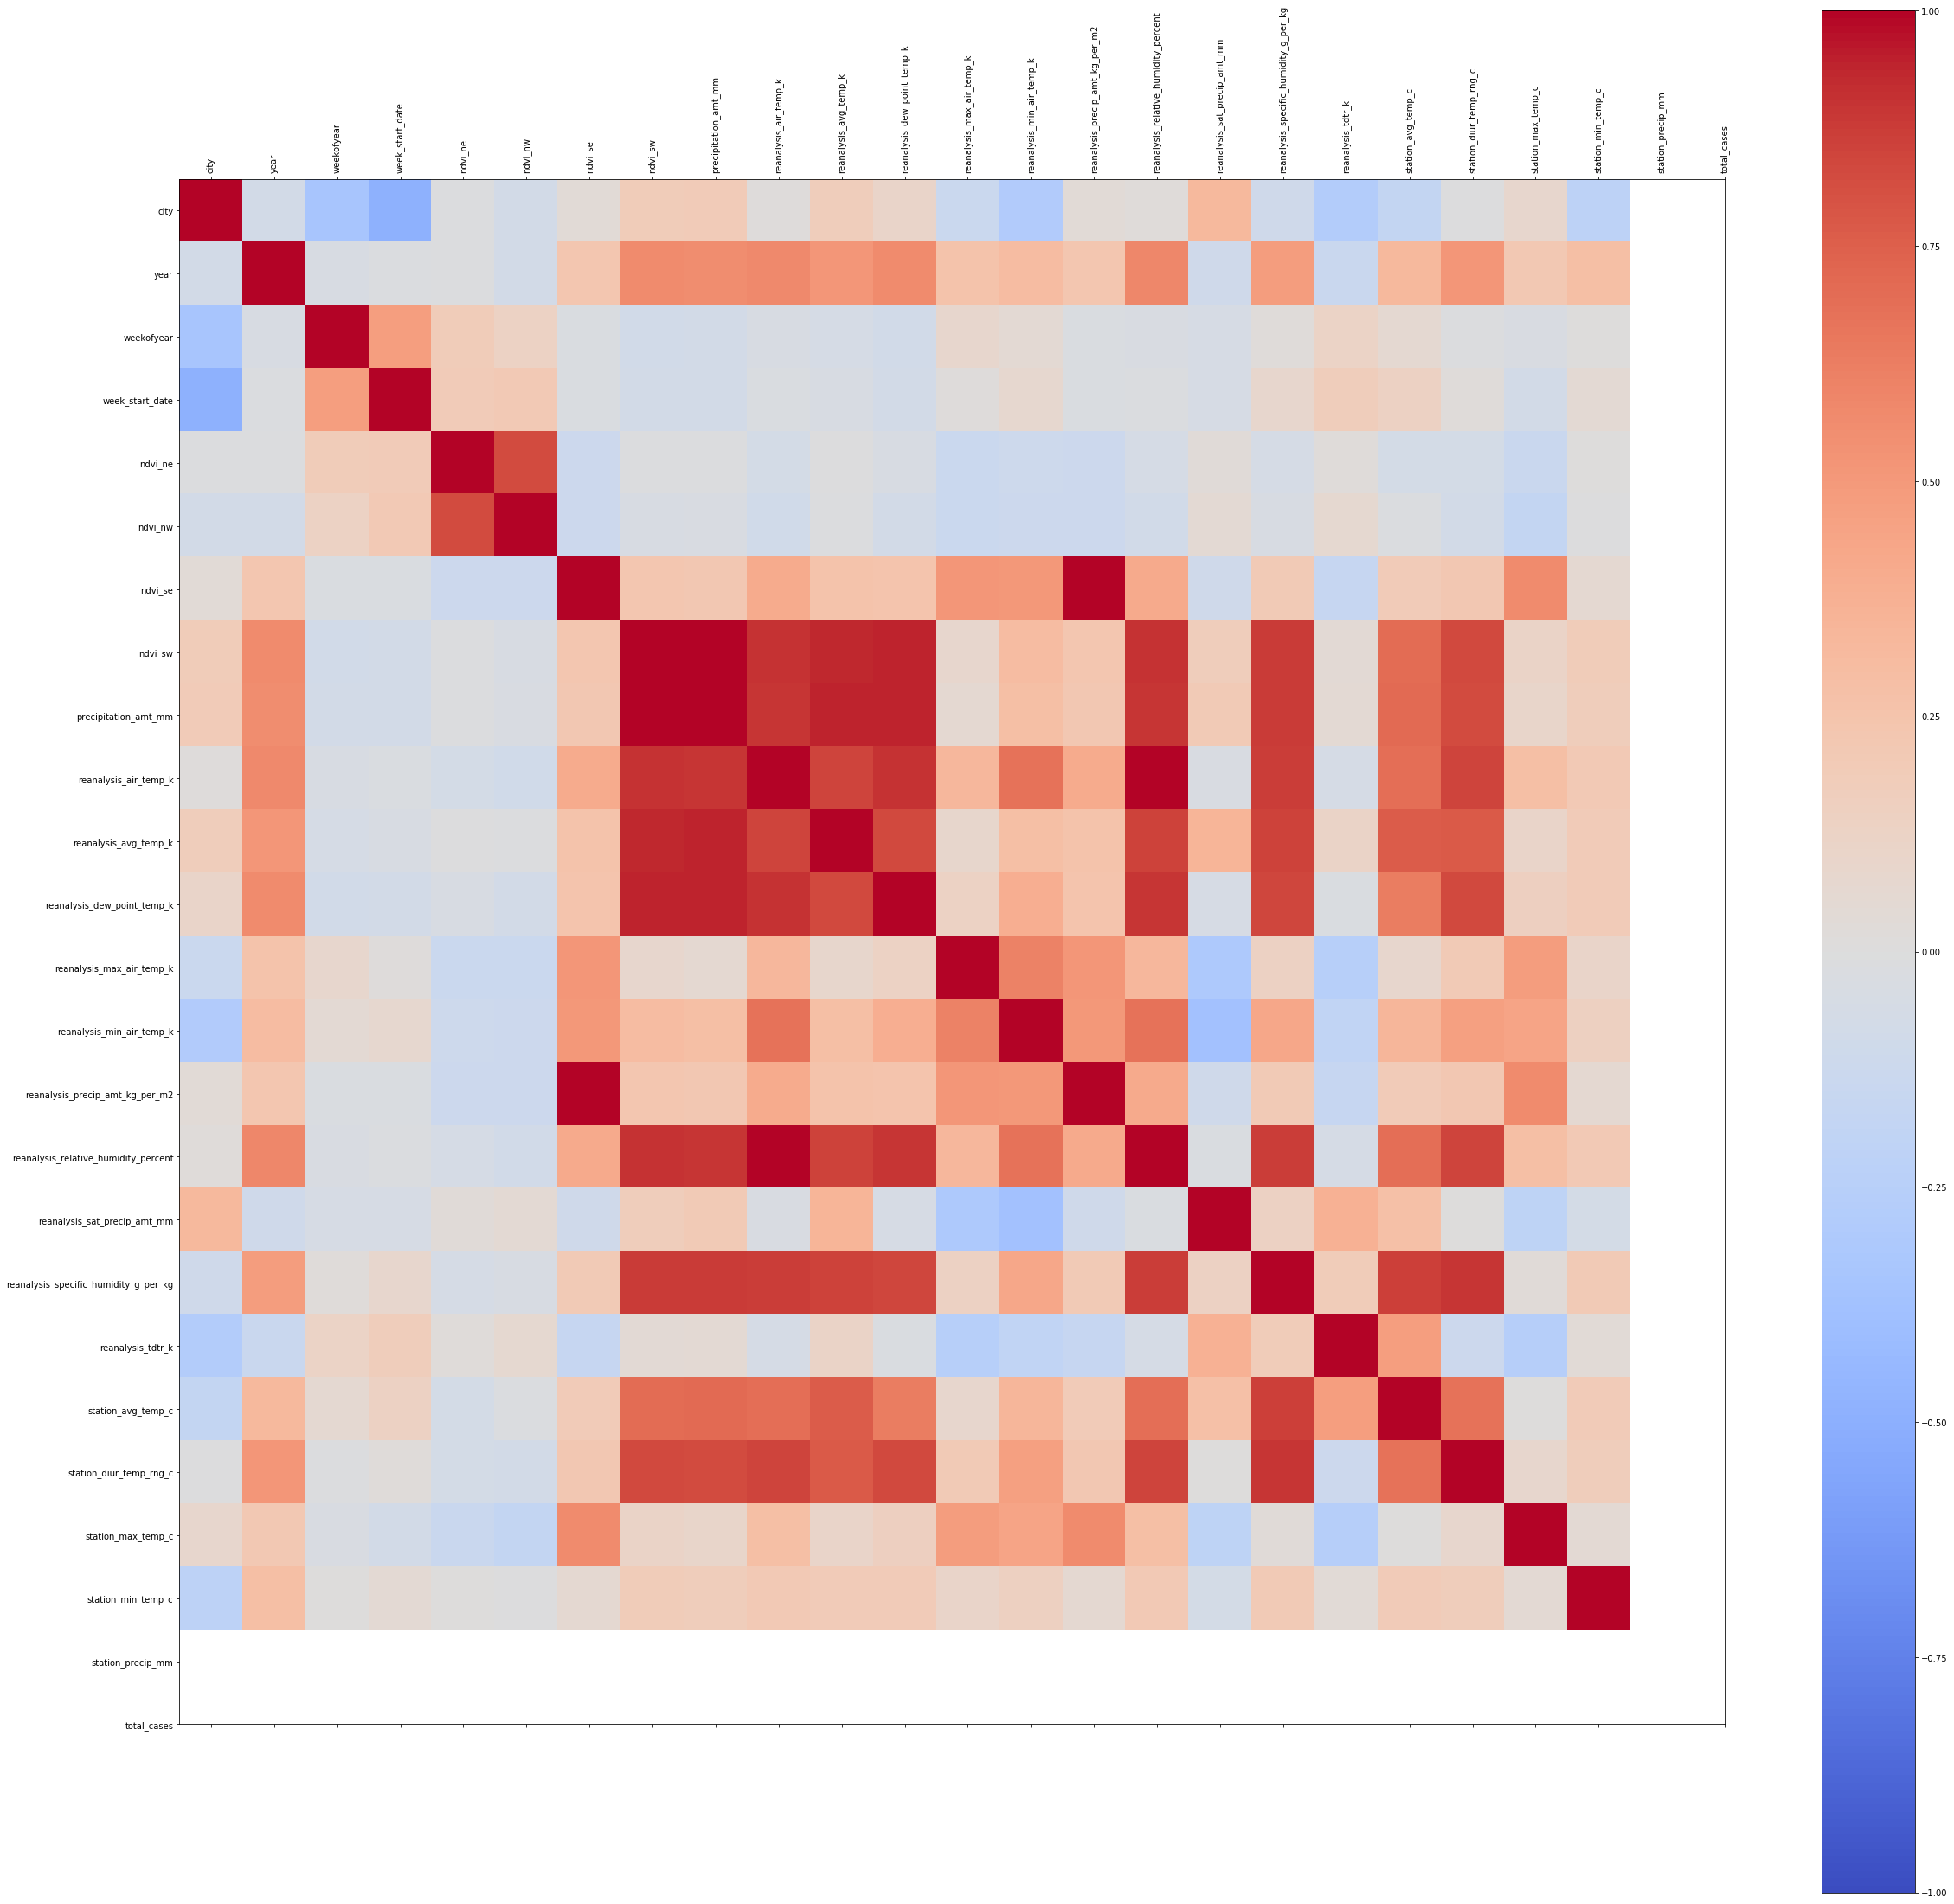

In [0]:
# plot correlation matrix for Iq  (Mean Imputed Values)
data_train_sj['total_cases'] = data_train_sj['total_cases'].astype('float')
corr = data_train_sj.corr()
fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_train_sj.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_train_sj.columns)
ax.set_yticklabels(data_train_sj.columns)
plt.show()

# Bar plot for IQ

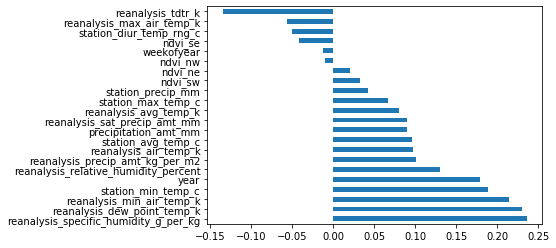

In [0]:
(corr_iq.total_cases.drop('total_cases').sort_values(ascending=False).plot.barh())

# Bar Plot For SJ

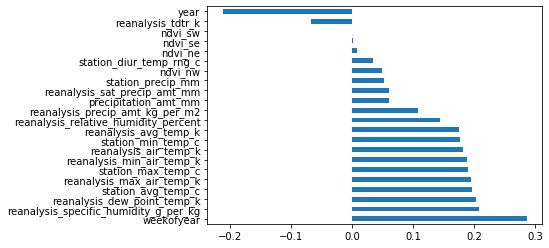

In [0]:
(corr_sj.total_cases.drop('total_cases').sort_values(ascending=False).plot.barh())




# Convert dataframes to numpy arrays




In [0]:
# Convert all the data to numpy arrays to use in our functions
X_data_train_sj = X_data_train_sj.to_numpy()
X_data_train_iq = X_data_train_iq.to_numpy()
y_data_train_sj = y_data_train_sj.to_numpy()
y_data_train_iq = y_data_train_iq.to_numpy()
X_data_test_sj = X_data_test_sj.to_numpy()
X_data_test_iq = X_data_test_iq.to_numpy()
X_train_regression_imputed_sj = X_train_regression_imputed_sj.to_numpy()
X_train_regression_imputed_iq = X_train_regression_imputed_iq.to_numpy()

# Shape check
assert X_data_train_sj.shape[1] == X_data_train_iq.shape[1]
assert X_data_train_sj.shape[0] == y_data_train_sj.shape[0]
assert X_data_test_sj.shape[1] == X_data_test_iq.shape[1]
assert X_data_train_iq.shape[0] == y_data_train_iq.shape[0]


# OLS, Ridge, Elastic Net, Kernel Regression without cross validation


In [0]:
def LinearRegressionOLS(X,y, X_test):
    LinearRegression = linear_model.LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(X,y)
    y_pred = lin_reg.predict(X_test)
    return lin_reg, y_pred

def RidgeRegression(X, y, alp, X_test):
    Ridge  = linear_model.Ridge
    ridge_reg =  Ridge(alpha = alp, solver = "cholesky")
    ridge_reg.fit(X,y)
    y_pred = ridge_reg.predict(X_test)
    return ridge_reg, y_pred

def LassoRegression(X, y, alp, X_test):
    Lasso = linear_model.Lasso
    lasso_reg  = Lasso(alpha = alp)
    lasso_reg.fit(X, y)
    y_pred = lasso_reg.predict(X_test)
    return lasso_reg, y_pred

def ElasticNetRegression(X, y, alp, ratio_l1, X_test):
    ElasticNet = linear_model.ElasticNet
    elastic_net = ElasticNet(alpha = alp, l1_ratio = ratio_l1) 
    elastic_net.fit(X, y)
    y_pred = elastic_net.predict(X_test)
    return elastic_net, y_pred


def KernelRegression(X, y, alp, X_test):
    KernelReg = sklearn.kernel_ridge.KernelRidge
    kernel_reg = KernelReg(alpha = alp)
    kernel_reg.fit(X,y)
    y_pred = kernel_reg.predict(X_test)
    return kernel_reg, y_pred


def RandomForestRegression(X, y, num_estimators, max_depth, X_test):
    RandomForestRegressor = ensemble.RandomForestRegressor
    random_forest_regressor = RandomForestRegressor(n_estimators= num_estimators, criterion = 'mae', max_depth=max_depth)
    random_forest_regressor.fit(X, y)
    y_pred = random_forest_regressor.predict(X_test)
    return random_forest_regressor, y_pred

def GradientBoostingRegression(X,y , num_estimators, learning_r, maximum_depth, X_test):
    GradientBoostingRegressor = ensemble.GradientBoostingRegressor
    gradient_boosting_regressor = GradientBoostingRegressor(loss='ls', n_estimators= num_estimators, max_depth= maximum_depth, learning_rate = learning_r)
    gradient_boosting_regressor.fit(X, y)
    y_pred = gradient_boosting_regressor.predict(X_test)
    return gradient_boosting_regressor, y_pred

def BaggingRegressor(X, y, X_test, n_estimators=16):
    BaggingRegressor = ensemble.BaggingRegressor
    bagging_regressor = BaggingRegressor(n_estimators=n_estimators)
    bagging_regressor.fit(X,y)
    y_pred = bagging_regressor.predict(X_test)
    return bagging_regressor, y_pred

# OLS, Ridge, Elastic Net, Kernel Regression **with** cross validation of hyperparameters 

In [0]:

# alps MUST be passed in as a array e.g. apls [0.1]
def RidgeRegressionCV(X, y,kfolds_num, alps, X_test):
    Ridge  = linear_model.RidgeCV
    ridge_reg =  Ridge(alphas = alps, cv = kfolds_num, scoring="neg_mean_absolute_error")
    ridge_reg.fit(X,y)
    y_pred = ridge_reg.predict(X_test)
    return ridge_reg, y_pred

def LassoRegressionCV(X, y, kfolds_num, alps, X_test):
    Lasso = linear_model.LassoCV
    lasso_reg  = Lasso(alphas = alps, cv = kfolds_num)
    lasso_reg.fit(X, y)
    y_pred = lasso_reg.predict(X_test)
    return lasso_reg, y_pred

def ElasticNetRegression(X, y, alps, l1_ratios_to_try, kfolds_num, X_test):
    # l1_ratios_to_try = [.1, .5, .7, .9, .95, .99, 1]
    ElasticNet = linear_model.ElasticNetCV
    elastic_net = ElasticNet(l1_ratio = l1_ratios_to_try, alphas = alps, cv = kfolds_num) 
    elastic_net.fit(X, y)
    y_pred = elastic_net.predict(X_test)
    return elastic_net, y_pred


def KernelRegressionCV(X, y, alps, n_comp_pca, X_test):
    KernelReg = sklearn.kernel_ridge.KernelRidge
    kernel_reg = KernelReg(alpha = alps)
    pca = sklearn.decomposition.PCA(n_components=n_comp_pca)
    X = pca.fit_transform(X)
    for x in X:
      print(x)
    kernel_reg.fit(X,y)
    y_pred = kernel_reg.predict(X_test)
    return kernel_reg, y_pred


[ 6  8  9 11]
[ 4.61259957  7.16871832  9.22519913 11.78131789]


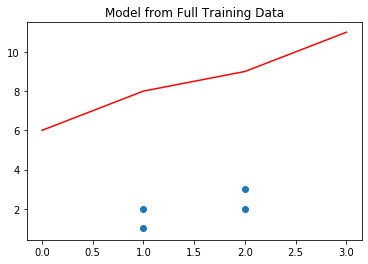

In [0]:
# X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# # y = 1 * x_0 + 2 * x_1 + 3
# y = np.dot(X, np.array([1, 2])) + 3
# print(y)
# print(KernelRegressionCV(X, y, [0.1, 0.2], X))
# plt.plot(y, color='red')
# plt.scatter(X[:,0], X[:,1])
# plt.title('Model from Full Training Data')
# plt.show()

# Main Code 



In [0]:
with_CV = True

if not with_CV:

  prediction_function = BaggingRegressor
  prediction_function_str = "BaggingRegressor"
  # num_estimators, learning_r, maximum_depth,
  # num_estimators=100, learning_r = 0.1, maximum_depth=3
  models_sj = []
  accuracies_mean_sj = []
  #Method 01 (Using Mean Imputed Values) 
  kf = KFold(n_splits=5)
  for train_index, test_index in kf.split(X_data_train_sj):
    X_tr, X_te = X_data_train_sj[train_index], X_data_train_sj[test_index]
    y_tr, y_te = y_data_train_sj[train_index], y_data_train_sj[test_index]
    model_sj, y_pred = prediction_function(X_tr, y_tr, X_test=X_te)
    accuracies_mean_sj.append(sklearn.metrics.mean_absolute_error(y_pred, y_te))
    models_sj.append(model_sj)
    #print(y_pred)
  print('mean imputed, sj: ',sum(accuracies_mean_sj) / 5)

  filename = "models_" + prediction_function_str + "_mean_sj.pickle"
  path = F"/content/gdrive/My Drive/models/{filename}" 
  pickle.dump(models_sj, open(path, 'wb'))

  models_iq = []
  accuracies_mean_iq = []
  kf = KFold(n_splits=5)
  for train_index, test_index in kf.split(X_data_train_iq):
    X_tr, X_te = X_data_train_iq[train_index], X_data_train_iq[test_index]
    y_tr, y_te = y_data_train_iq[train_index], y_data_train_iq[test_index]
    model_iq, y_pred = prediction_function(X_tr, y_tr, X_test=X_te)
    accuracies_mean_iq.append(sklearn.metrics.mean_absolute_error(y_pred, y_te))
    models_iq.append(model_iq)
  print('mean imputed, iq: ',sum(accuracies_mean_iq) / 5)

  filename = "models_" + prediction_function_str + "_mean_iq.pickle"
  path = F"/content/gdrive/My Drive/models/{filename}" 
  pickle.dump(models_iq, open(path, 'wb'))

# Method 02 (using Regression Imputed Values)

  models_sj = []
  accuracies_regr_sj = []
  kf = KFold(n_splits=5)
  for train_index, test_index in kf.split(X_train_regression_imputed_sj):
    X_tr, X_te = X_train_regression_imputed_sj[train_index], X_train_regression_imputed_sj[test_index]
    y_tr, y_te = y_data_train_sj[train_index], y_data_train_sj[test_index]
    model_sj, y_pred = prediction_function(X_tr, y_tr, X_test=X_te)
    accuracies_regr_sj.append(sklearn.metrics.mean_absolute_error(y_pred, y_te))
    models_sj.append(model_sj)
  print('regression imputed, sj: ',sum(accuracies_regr_sj) / 5)

  filename = "models_" + prediction_function_str + "_regression_sj.pickle"
  path = F"/content/gdrive/My Drive/models/{filename}" 
  pickle.dump(models_sj, open(path, 'wb'))

  models_iq = []
  accuracies_regr_iq = []
  kf = KFold(n_splits=5)
  for train_index, test_index in kf.split(X_train_regression_imputed_iq):
    X_tr, X_te = X_train_regression_imputed_iq[train_index], X_train_regression_imputed_iq[test_index]
    y_tr, y_te = y_data_train_iq[train_index], y_data_train_iq[test_index]
    model_iq, y_pred = prediction_function(X_tr, y_tr, X_test=X_te)
    accuracies_regr_iq.append(sklearn.metrics.mean_absolute_error(y_pred, y_te))
    models_iq.append(model_iq)
  print('regression imputed, iq:',sum(accuracies_regr_iq) / 5)

  filename = "models_" + prediction_function_str + "_regression_iq.pickle"
  path = F"/content/gdrive/My Drive/models/{filename}" 
  pickle.dump(models_sj, open(path, 'wb'))

else:
  prediction_function_CV = RidgeRegressionCV
  prediction_function_CV_str = "RidgeRegressionCV"
  n_pca = 2

  models_sj = []
  accuracies_mean_sj = []
  kf = KFold(n_splits=5)
  for train_index, test_index in kf.split(X_data_train_sj):
    X_tr, X_te = X_data_train_sj[train_index], X_data_train_sj[test_index]
    y_tr, y_te = y_data_train_sj[train_index], y_data_train_sj[test_index]
    model_sj, y_pred = prediction_function_CV(X_tr, y_tr, alps=[x/10 for x in range(0,100,5)], X_test=X_te, kfolds_num=5)
    accuracies_mean_sj.append(sklearn.metrics.mean_absolute_error(y_pred, y_te))
    models_sj.append(model_sj)
  print('mean imputed, sj: ',sum(accuracies_mean_sj) / 5)

  filename = "models_" + prediction_function_CV_str + "_mean_sj.pickle"
  path = F"/content/gdrive/My Drive/models/{filename}" 
  pickle.dump(models_sj, open(path, 'wb'))

  models_iq = []
  accuracies_mean_iq = []
  kf = KFold(n_splits=5)
  for train_index, test_index in kf.split(X_data_train_iq):
    X_tr, X_te = X_data_train_iq[train_index], X_data_train_iq[test_index]
    y_tr, y_te = y_data_train_iq[train_index], y_data_train_iq[test_index]
    model_iq, y_pred = prediction_function_CV(X_tr, y_tr,alps=[x/10 for x in range(0,100,5)], X_test=X_te, kfolds_num=5)
    accuracies_mean_iq.append(sklearn.metrics.mean_absolute_error(y_pred, y_te))
  print('mean imputed, iq: ', sum(accuracies_mean_iq) / 5)

  filename = "models_" + prediction_function_CV_str + "_mean_iq.pickle"
  path = F"/content/gdrive/My Drive/models/{filename}" 
  pickle.dump(models_iq, open(path, 'wb'))

  # regression imputed

  models_sj = []
  accuracies_regr_sj = []
  kf = KFold(n_splits=5)
  for train_index, test_index in kf.split(X_train_regression_imputed_sj):
    X_tr, X_te = X_train_regression_imputed_sj[train_index], X_train_regression_imputed_sj[test_index]
    y_tr, y_te = y_data_train_sj[train_index], y_data_train_sj[test_index]
    model_sj, y_pred = prediction_function_CV(X_tr, y_tr, alps=[x/10 for x in range(0,100,5)], X_test=X_te, kfolds_num=5)
    accuracies_regr_sj.append(sklearn.metrics.mean_absolute_error(y_pred, y_te))
    models_sj.append(model_sj)
  print('regression imputed, sj: ',sum(accuracies_regr_sj) / 5)

  filename = "models_" + prediction_function_CV_str + "_regression_sj.pickle"
  path = F"/content/gdrive/My Drive/models/{filename}" 
  pickle.dump(models_sj, open(path, 'wb'))

  models_iq = []
  accuracies_regr_iq = []
  kf = KFold(n_splits=5)
  for train_index, test_index in kf.split(X_train_regression_imputed_iq):
    X_tr, X_te = X_train_regression_imputed_iq[train_index], X_train_regression_imputed_iq[test_index]
    y_tr, y_te = y_data_train_iq[train_index], y_data_train_iq[test_index]
    model_iq, y_pred = prediction_function_CV(X_tr, y_tr, alps=[x/10 for x in range(0,100,5)], X_test=X_te, kfolds_num=5)
    accuracies_regr_iq.append(sklearn.metrics.mean_absolute_error(y_pred, y_te))
    models_iq.append(model_iq)
  print('regression imputed, iq: ',sum(accuracies_regr_iq) / 5)

  filename = "models_" + prediction_function_CV_str + "_regression_iq.pickle"
  path = F"/content/gdrive/My Drive/models/{filename}" 
  pickle.dump(models_sj, open(path, 'wb'))

mean imputed, sj:  28.761112183070093
mean imputed, iq:  6.838016061918654
regression imputed, sj:  28.879151333524902
regression imputed, iq:  6.807151129020272


# Scores:
OLS:

*   mean imputed, sj:  29.168905913415927
*   mean imputed, iq:  6.8399866472402095
*   regression imputed, sj:  28.890970566353047
*   regression imputed, iq: 6.8193495595292175

Ridge:
*   mean imputed, sj:  28.920965432063394
*   mean imputed, iq:  6.808963514214744
*   regression imputed, sj:  28.835143676312832
*   regression imputed, iq:  6.785164877842851

Lasso:
*   mean imputed, sj:  28.77430125517251
*   mean imputed, iq:  6.8133435316067885
*   regression imputed, sj:  28.761707693701375
*   regression imputed, iq:  6.8266466087443

ElasticNet:
*   mean imputed, sj:  28.77632110482046
*   mean imputed, iq:  6.815438109004431
*   regression imputed, sj:  28.78797287579158
*   regression imputed, iq:  6.817201055489536

RandomForests, 100 estimators:
*   mean imputed, sj:  32.90370266810786
*   mean imputed, iq:  7.596048076923077
*   regression imputed, sj:  33.296109398111284
*   regression imputed, iq: 7.68326923076923

RandomForests, 1000 estimators:
*   mean imputed, sj:  32.66080130560929
*   mean imputed, iq:  7.683057692307694
*   regression imputed, sj:  33.00587241722608
*   regression imputed, iq: 7.67959423076923

GradientBoosting:
*   mean imputed, sj:  31.098715266463046
*   mean imputed, iq:  7.637982854220853
*   regression imputed, sj:  31.88351265001993
*   regression imputed, iq: 7.608261596794124

RandomForest optimal:
*   mean imputed, sj:  33.164747773559924
*   mean imputed, iq:  7.779050116550115
*   regression imputed, sj:  33.14519138937446
*   regression imputed, iq: 7.715238927738928

BaggingTrees, optimal:
*   mean imputed, sj:  33.04494143958357
*   mean imputed, iq:  7.54142342032967
*   regression imputed, sj:  33.4509787328858
*   regression imputed, iq: 7.584032451923077



In [0]:
# get hyperparams
prediction_function_str = "GradientBoostingRegression"
filename = "models_" + prediction_function_str + "_regression_sj.pickle"
path = F"/content/gdrive/My Drive/models/{filename}" 
models_sj = pickle.load(open(path, "rb"))
model = models_sj[0]
print(model.get_params)

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)>


In [0]:
y_pred = np.array(len(X_test_regression_imputed_sj) + len(X_test_regression_imputed_iq))
# predict values
#models = pickle.load()
prediction_function_str = "RidgeRegressionCV"
filename = "models_" + prediction_function_str + "_regression_sj.pickle"
path = F"/content/gdrive/My Drive/models/{filename}" 
models_sj = pickle.load(open(path, "rb"))
filename = "models_" + prediction_function_str + "_regression_iq.pickle"
path = F"/content/gdrive/My Drive/models/{filename}" 
models_iq = pickle.load(open(path, "rb"))

y_pred_sj = np.zeros(len(X_test_regression_imputed_sj))
for model in models_sj:
  y_pred_sj += model.predict(X_test_regression_imputed_sj)
print(y_pred_sj)
y_pred_sj = y_pred_sj/5
print(y_pred_sj)

y_pred_iq = np.zeros(len(X_test_regression_imputed_iq))
for model in models_sj:
  y_pred_iq += model.predict(X_test_regression_imputed_iq)
y_pred_iq = y_pred_iq/5

save_filename = 'y_pred.csv'
save_path = F"/content/gdrive/My Drive/models/{save_filename}"
y_pred = np.concatenate([y_pred_sj, y_pred_iq])
y_pred = y_pred.reshape((len(y_pred),1))
np.savetxt(save_path, y_pred, delimiter=',', fmt='%d')

[73.227273 84.606061 127.000000 259.803030 148.287879 114.636364 87.742424
 304.181818 115.181818 219.484848 183.681818 260.606061 162.863636
 115.333333 219.287879 257.075758 252.303030 279.848485 602.151515
 357.454545 260.015152 250.848485 300.045455 193.666667 201.772727
 229.560606 186.863636 145.969697 196.242424 208.378788 190.121212
 135.136364 124.954545 161.696970 73.181818 205.818182 80.166667
 162.227273 109.303030 134.212121 61.500000 138.575758 103.015152
 112.030303 71.712121 137.893939 88.651515 70.075758 102.060606 64.590909
 62.787879 82.560606 128.696970 139.681818 163.530303 147.772727
 296.575758 136.621212 213.015152 123.878788 139.212121 373.454545
 196.924242 340.530303 268.000000 271.151515 346.848485 202.575758
 304.333333 400.484848 646.454545 265.757576 273.545455 310.136364
 349.606061 351.666667 323.848485 191.833333 139.742424 100.772727
 157.212121 171.909091 105.651515 235.924242 150.848485 207.803030
 103.196970 120.787879 166.560606 81.848485 286.4848

In [0]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

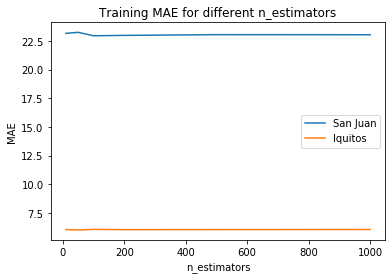

In [20]:
maes_sj = []
maes_iq = []
ns = [10, 50, 100, 200, 500, 1000]
for n_estimators in ns:
  regr_sj = sklearn.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=5)
  regr_iq = sklearn.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=2)
  regr_sj.fit(X_train_regression_imputed_sj, y_data_train_sj)
  regr_iq.fit(X_train_regression_imputed_iq, y_data_train_iq)
  y_pred_sj = regr_sj.predict(X_train_regression_imputed_sj)
  y_pred_iq = regr_iq.predict(X_train_regression_imputed_iq)
  maes_sj.append(sklearn.metrics.mean_absolute_error(y_data_train_sj, y_pred_sj))
  maes_iq.append(sklearn.metrics.mean_absolute_error(y_data_train_iq, y_pred_iq))

plt.plot(ns, maes_sj, label="San Juan")
plt.plot(ns, maes_iq, label="Iquitos")
plt.title("Training MAE for different n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("MAE")
plt.legend()